In [6]:
IMG_PATH = "/Users/nathaniel.rindlaub/Downloads/nzdoc-test-images/stoat_3C47B454-8308-415F-89C5-3D0B94E87952.JPG"
BBOX = [0.5696394443511963,0.2648513615131378,0.8928725123405457,0.6756160855293274]

IMG_SIZE = 480
BUFFER = 0.1

In [31]:
def nzdoc_crop_and_resize(img, bbox_rel, out_size=IMG_SIZE, image_buffer=BUFFER):
    """
    Crops an image to the bounding box, and resizes to a square.

    NOTE: this replicates the behavior of NZ DOC's Crop_Resize_Image.py script, 
    in which they they crop to the dimensions of the bounding box and resize the
    arbitrary image shape to a square, thus distorting aspect ratio.

    It might be worth consulting with their ML engineers to ask whether they 
    think MSFT's approach (cropping to smallest square that encloses the bbox,
    and then resizing to preserve aspect ratio) might be better? Might also
    require retraining the model

    Args:
        img: PIL.Image.Image object, already loaded
        bbox_rel: list or tuple of float, [ymin, xmin, ymax, xmax] all in
            relative coordinates

    Returns: cropped image
    """

    print(f"cropping image. original image size: {img.size}")
    print(f"bbox_rel: {bbox_rel}")

    img_w, img_h = img.size
    # xmin = int(bbox_rel[1] * img_w)
    # ymin = int(bbox_rel[0] * img_h)
    # box_w = int((bbox_rel[3] - bbox_rel[1]) * img_w)
    # box_h = int((bbox_rel[2] - bbox_rel[0]) * img_h)

    left = bbox_rel[1]
    top = bbox_rel[0]
    right = bbox_rel[3]
    bottom = bbox_rel[2]

    print(f"left: {left}, top: {top}, right: {right}, bottom: {bottom}")


    # add buffer
    left = left - image_buffer
    if left < 0:
        left = 0
    top = top - image_buffer
    if top < 0:
        top = 0
    right = right + image_buffer
    if right > 1:
        right = 1
    bottom = bottom + image_buffer
    if bottom > 1:
        bottom = 1

    # Image.crop() takes box=[left, upper, right, lower]
    img = img.crop((
        int(left * img_w),
        int(top * img_h),
        int(right * img_w),
        int(bottom * img_h)
    ))
    img = img.resize((out_size, out_size), resample=3)
    print(f"cropped & resized image size: {img.size}")

    return img

In [30]:
def mira_crop(img, bbox_rel):
    """
    Crops an image to the tightest square enclosing each bounding box. 
    This will always generate a square crop whose size is the larger of the 
    bounding box width or height. In the case that the square crop boundaries 
    exceed the original image size, the crop is padded with 0s.

    Args:
        img: PIL.Image.Image object, already loaded
        bbox_rel: list or tuple of float, [ymin, xmin, ymax, xmax] all in
            relative coordinates

    Returns: cropped image
    """

    print(f"cropping image. original image size: {img.size}")

    img_w, img_h = img.size
    xmin = int(bbox_rel[1] * img_w)
    ymin = int(bbox_rel[0] * img_h)
    box_w = int((bbox_rel[3] - bbox_rel[1]) * img_w)
    box_h = int((bbox_rel[2] - bbox_rel[0]) * img_h)

    # expand box width or height to be square, but limit to img size
    box_size = max(box_w, box_h)
    xmin = max(0, min(
        xmin - int((box_size - box_w) / 2),
        img_w - box_w))
    ymin = max(0, min(
        ymin - int((box_size - box_h) / 2),
        img_h - box_h))
    box_w = min(img_w, box_size)
    box_h = min(img_h, box_size)

    # if box_w == 0 or box_h == 0:
    #     tqdm.write(f'Skipping size-0 crop (w={box_w}, h={box_h}) at {save}')
    #     return False

    # Image.crop() takes box=[left, upper, right, lower]
    crop = img.crop(box=[xmin, ymin, xmin + box_w, ymin + box_h])

    if (box_w != box_h):
        # pad to square using 0s
        crop = ImageOps.pad(crop, size=(box_size, box_size), color=0)

    print(f"cropped image size: {crop.size}")

    return crop

cropping image. original image size: (2688, 1504)
cropped image size: (1104, 1104)


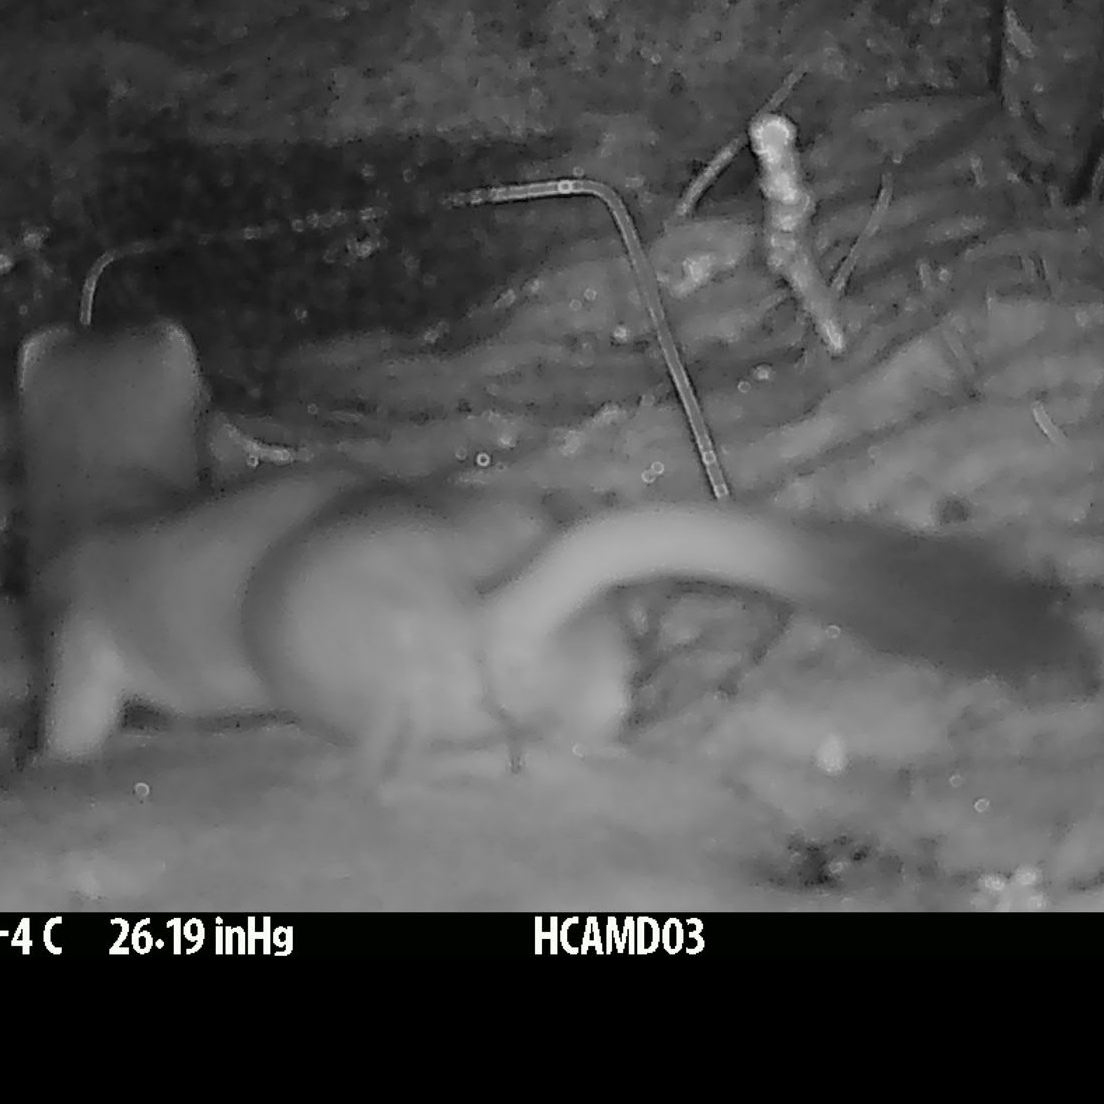

In [32]:
from PIL import Image

with Image.open(IMG_PATH) as im:
    # cropped = nzdoc_crop_and_resize(im, BBOX)
    cropped = mira_crop(im, BBOX)
    display(cropped)

In [9]:
display(cropped)

None